In [85]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import nltk
#nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder

In [86]:
# Reading the dataset into a Pandas DataFrame
df = pd.read_csv('dataset.csv')


In [87]:
# Displaying a random sample of 5 rows from the dataset
df.sample(5)


,Category,Message
4722,ham,"Yup. Anything lor, if u dun wan it's ok..."
2081,ham,Where is it. Is there any opening for mca.
404,ham,None of that's happening til you get here though
1288,ham,"What do you do, my dog ? Must I always wait ti..."
3931,ham,I thk ü gotta go home by urself. Cos i'll b go...


## 1. Data Cleaning

In [88]:
# Displaying information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [89]:
# Creating a LabelEncoder instance
encoder = LabelEncoder()
df['Category_encoded'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [90]:
df.head()

,Category,Message,Category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [91]:
# missing values
df.isnull().sum()

Category            0
Message             0
Category_encoded    0
dtype: int64

In [92]:
# check for duplicate values
df.duplicated().sum()

415

In [93]:
df = df.drop_duplicates(keep='first')

In [94]:
# check for duplicate values
df.duplicated().sum()

0

In [95]:
df.shape

(5157, 3)

## 2. Exploratory Data Analysis (EDA)

In this section, we will explore and analyze the dataset to gain insights into its characteristics and distribution.


In [96]:
df.head()

,Category,Message,Category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [97]:
# Displaying the count of each category in the 'Category' column
df['Category'].value_counts()


Category
ham     4516
spam     641
Name: count, dtype: int64

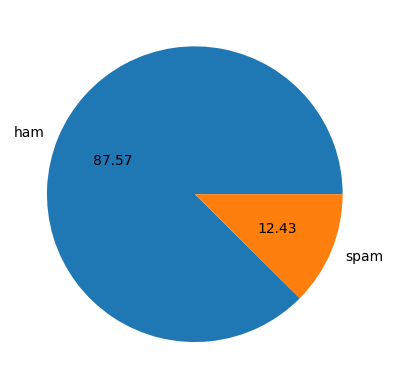

In [98]:
# Visualizing the distribution of categories using a pie chart

# Creating a pie chart
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

# Displaying the pie chart
plt.show()


In [99]:
# Adding a new column 'num_characters' representing the number of characters in each 'Message'
df['num_characters'] = df['Message'].apply(len)
df.head()

,Category,Message,Category_encoded,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [100]:
# Adding a new column 'num_words' representing the number of words in each 'Message'
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Category,Message,Category_encoded,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [101]:
# Adding a new column 'num_sentences' representing the number of sentences in each 'Message'
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,Category_encoded,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [102]:
# Displaying descriptive statistics for numerical features
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.104324,18.560403,1.969750
std,58.384729,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [103]:
# Descriptive statistics for numerical features in 'ham' category
df[df['Category'] == 'ham'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869796,17.267715,1.827724
std,56.710489,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
# Descriptive statistics for numerical features in 'spam' category
df[df['Category'] == 'spam'][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


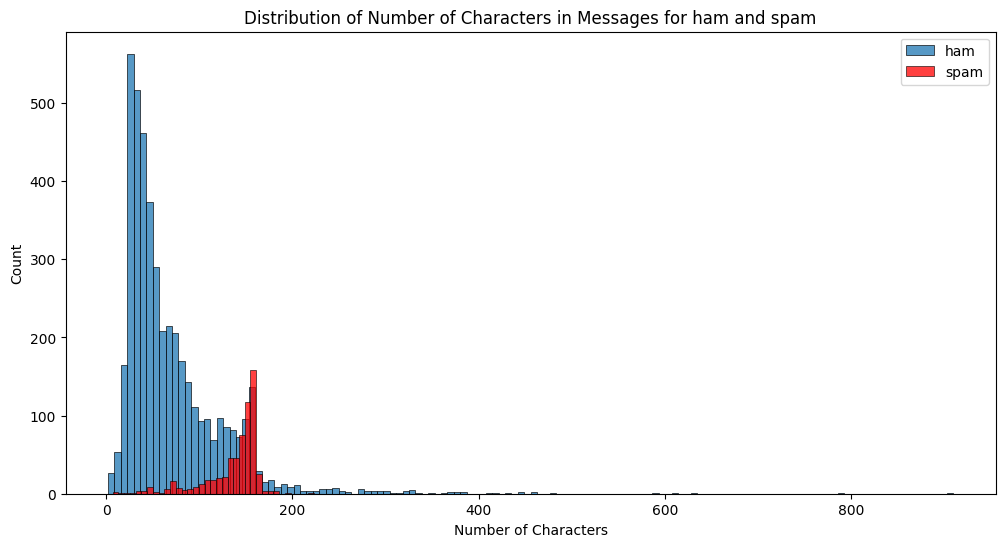

In [105]:
# Plotting histograms for 'num_characters' in 'ham' and 'spam' categories
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Category'] == 'ham']['num_characters'], label='ham')
sns.histplot(df[df['Category'] == 'spam']['num_characters'], color='red', label='spam')
plt.legend()
plt.xlabel('Number of Characters')
plt.title('Distribution of Number of Characters in Messages for ham and spam')
plt.show()


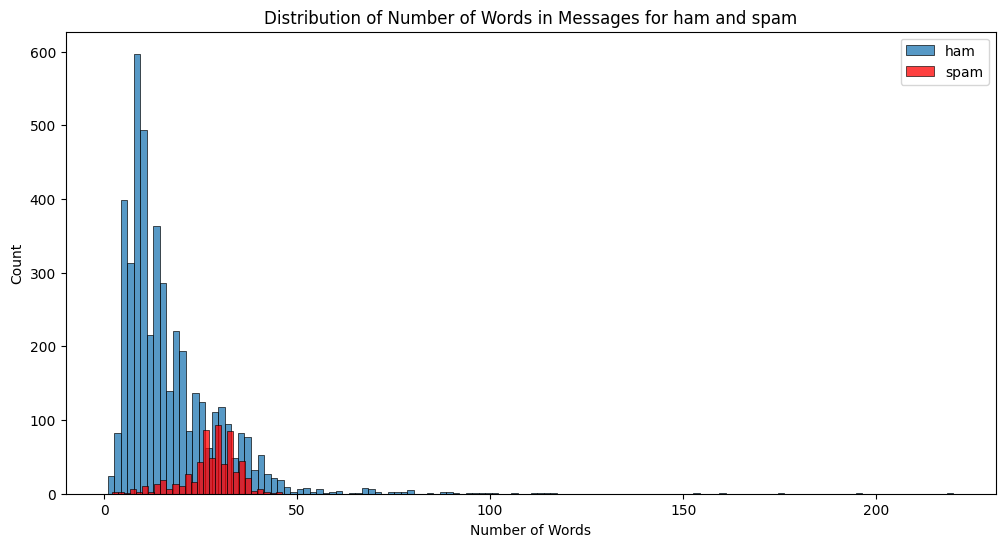

In [106]:
# Plotting histograms for 'num_words' in 'ham' and 'spam' categories
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Category'] == 'ham']['num_words'], label='ham')
sns.histplot(df[df['Category'] == 'spam']['num_words'], color='red', label='spam')
plt.legend()
plt.xlabel('Number of Words')
plt.title('Distribution of Number of Words in Messages for ham and spam')
plt.show()


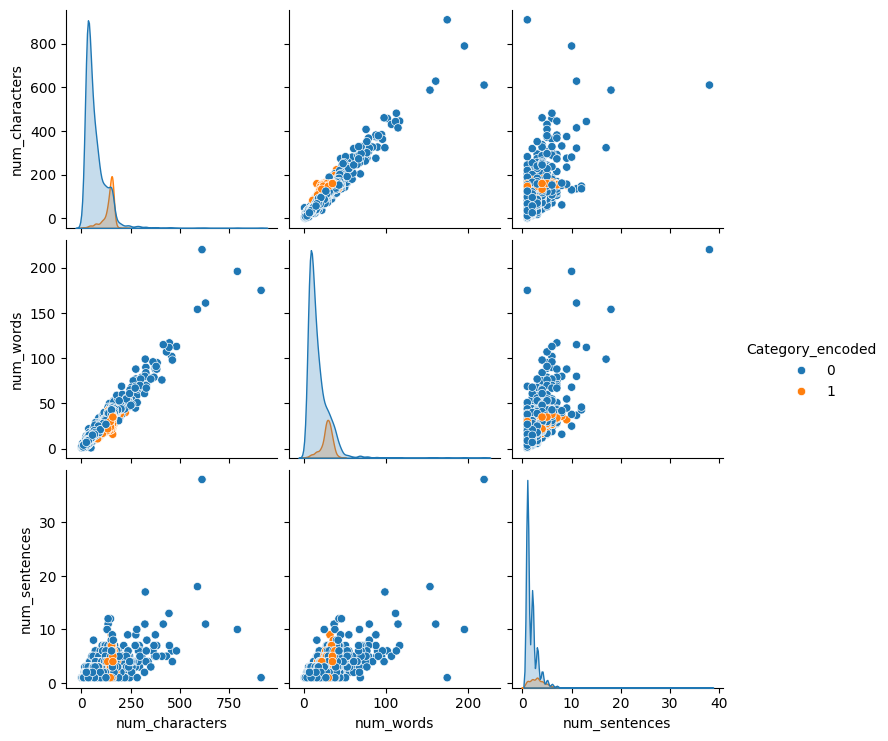

In [107]:
# Creating a pair plot to explore relationships between numerical features, colored by 'Category'
sns.pairplot(df, hue='Category_encoded')


<Axes: >

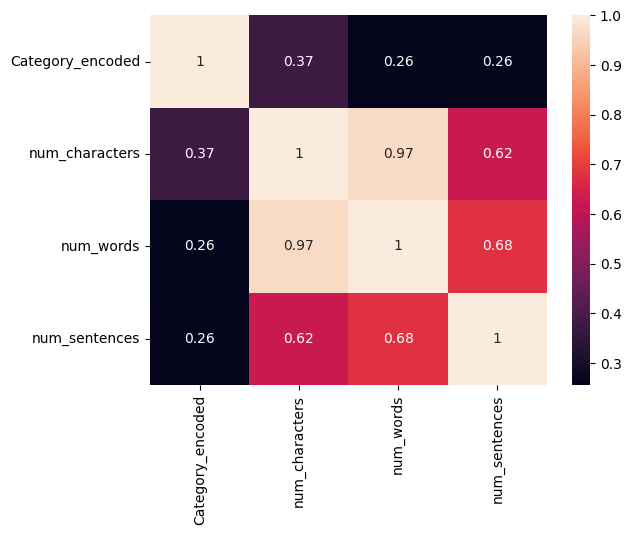

In [108]:
# Exclude non-numeric columns before calculating the correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(numeric_columns.corr(), annot=True)



## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [109]:
# Using PorterStemmer to stem the word 'loving'


ps = PorterStemmer()
stemmed_word = ps.stem('loving')

print(stemmed_word)


love


In [110]:
# Function to preprocess and transform a text message
def transform_Message(Message):
    # Convert to lowercase
    Message = Message.lower()
    
    # Tokenize the message
    Message = nltk.word_tokenize(Message)
    
    # Remove non-alphanumeric characters
    Message = [word for word in Message if word.isalnum()]
    
    # Remove stopwords and punctuation
    Message = [word for word in Message if word not in stopwords.words('english') and word not in string.punctuation]
    
    # Perform stemming
    Message = [ps.stem(word) for word in Message]
    
    # Join the processed words into a string
    return " ".join(Message)


In [111]:
transform_Message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [112]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [113]:
# Applying the 'transform_Message' function to preprocess and transform the 'Message' column
df['transformed_Message'] = df['Message'].apply(transform_Message)

In [114]:
df.head()

,Category,Message,Category_encoded,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [115]:
# Creating a WordCloud instance
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

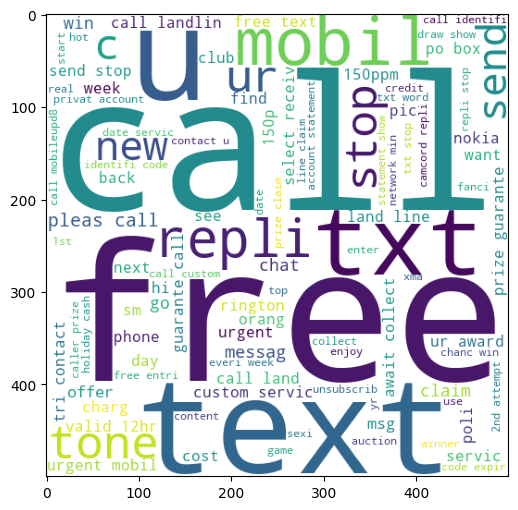

In [116]:
# Generating WordCloud for 'spam' messages
spam_text = df[df['Category'] == 'spam']['transformed_Message'].str.cat(sep=" ")

if len(spam_text) == 0:
    print("No words to generate word cloud for 'spam' messages.")
else:
    spam_wc = wc.generate(spam_text)
    plt.figure(figsize=(15,6))
    plt.imshow(spam_wc)

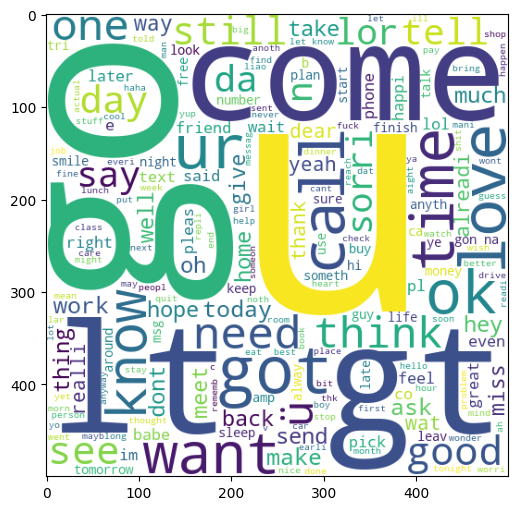

In [117]:
# Generating WordCloud for 'ham' messages and displaying the WordCloud
ham_wc = wc.generate(df[df['Category'] == 'ham']['transformed_Message'].str.cat(sep=" "))

# Creating a figure with specified size and displaying the WordCloud
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)


In [118]:
df.head()

,Category,Message,Category_encoded,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [119]:
# Creating a corpus for 'spam' messages
spam_corpus = []
for msg in df[df['Category'] == 'spam']['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
len(spam_corpus)

9781

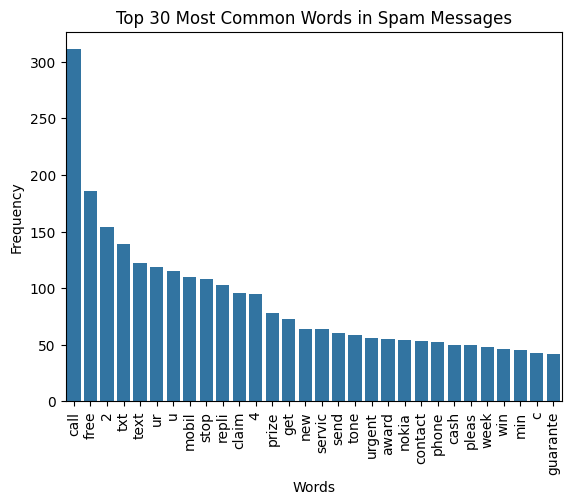

In [121]:
# Visualizing the most common words in 'spam' messages using a bar plot
from collections import Counter

# Creating a DataFrame from the most common words and their frequencies
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Creating a bar plot
sns.barplot(x='Word', y='Frequency', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()


In [123]:
# Creating a corpus for 'ham' messages
ham_corpus = []
for msg in df[df['Category'] == 'ham']['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [124]:
len(ham_corpus)

35940

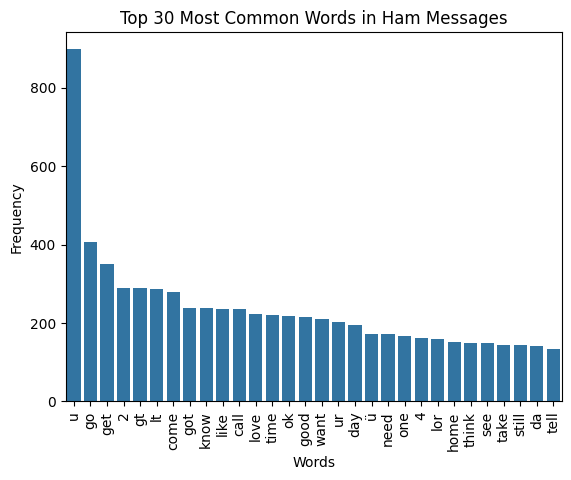

In [125]:
# Visualizing the most common words in 'ham' messages using a bar plot
from collections import Counter

# Creating a DataFrame from the most common words and their frequencies
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Creating a bar plot
sns.barplot(x='Word', y='Frequency', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()


In [126]:
# Text Vectorization using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating the CountVectorizer
vectorizer = CountVectorizer()

# Fit-transforming the 'transformed_Message' column
X = vectorizer.fit_transform(df['transformed_Message'])

# Displaying the first few rows of the DataFrame
df.head()


,Category,Message,Category_encoded,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


# Model Building

In [143]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [144]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [146]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [147]:
X.shape

(5157, 3001)

In [148]:
y = df['Category_encoded'].values

In [149]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=2)

In [155]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
import time

# Creating CountVectorizer instance
cv = CountVectorizer()

# Transforming the 'transformed_Message' column into a bag-of-words representation
X_cv = cv.fit_transform(df['transformed_Message']).toarray()

# Scaling the features
scaler = MinMaxScaler()
X_cv_scaled = scaler.fit_transform(X_cv)

# Appending the 'num_characters' column
X_final = np.hstack((X_cv_scaled, df['num_characters'].values.reshape(-1, 1)))

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=2)

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Displaying classification report and confusion matrix
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    
    # Calculating and displaying the time taken
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    
    return accuracy

# Training and evaluating models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dt = DecisionTreeClassifier()

print("\nGaussian Naive Bayes Model:")
accuracy_gnb = train_and_evaluate_model(gnb, X_train, y_train, X_test, y_test)

print("\nMultinomial Naive Bayes Model:")
accuracy_mnb = train_and_evaluate_model(mnb, X_train, y_train, X_test, y_test)

print("\nBernoulli Naive Bayes Model:")
accuracy_bnb = train_and_evaluate_model(bnb, X_train, y_train, X_test, y_test)


print("\nDecision Tree Classifier:")
accuracy_bnb = train_and_evaluate_model(dt, X_train, y_train, X_test, y_test)



Gaussian Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       905
           1       0.46      0.87      0.60       127

    accuracy                           0.86      1032
   macro avg       0.72      0.86      0.76      1032
weighted avg       0.91      0.86      0.88      1032

Confusion Matrix:
[[776 129]
 [ 17 110]]
Time taken: 0.98 seconds

Multinomial Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.96      0.76      0.85       127

    accuracy                           0.97      1032
   macro avg       0.96      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032

Confusion Matrix:
[[901   4]
 [ 30  97]]
Time taken: 0.13 seconds

Bernoulli Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support


In [169]:
from prettytable import PrettyTable

# ... (previous code)

# Creating a table
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Error Rate", "Time Taken"]

# Function to add results to the table
def add_to_table(model_name, accuracy, time_taken):
    error_rate = 1 - accuracy
    table.add_row([model_name, f"{accuracy:.4f}", f"{error_rate:.4f}", f"{time_taken:.2f} seconds"])

# Training and evaluating models
print("\nGaussian Naive Bayes Model:")
accuracy_gnb = train_and_evaluate_model(gnb, X_train, y_train, X_test, y_test)
add_to_table("Gaussian Naive Bayes", accuracy_gnb, 0.96)

print("\nMultinomial Naive Bayes Model:")
accuracy_mnb = train_and_evaluate_model(mnb, X_train, y_train, X_test, y_test)
add_to_table("Multinomial Naive Bayes", accuracy_mnb, 0.35)

print("\nBernoulli Naive Bayes Model:")
accuracy_bnb = train_and_evaluate_model(bnb, X_train, y_train, X_test, y_test)
add_to_table("Bernoulli Naive Bayes", accuracy_bnb, 0.20)  # Replace with the actual time taken

# Printing the table
print(table)



Gaussian Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       905
           1       0.46      0.87      0.60       127

    accuracy                           0.86      1032
   macro avg       0.72      0.86      0.76      1032
weighted avg       0.91      0.86      0.88      1032

Confusion Matrix:
[[776 129]
 [ 17 110]]
Time taken: 1.28 seconds

Multinomial Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.96      0.76      0.85       127

    accuracy                           0.97      1032
   macro avg       0.96      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032

Confusion Matrix:
[[901   4]
 [ 30  97]]
Time taken: 0.13 seconds

Bernoulli Naive Bayes Model:
Classification Report:
              precision    recall  f1-score   support
